# Credit Card Fraud - Jupyter Notebook
<br><br>
<b>Notebook objective:</b> build a machine learning fraud detection engine in Python

<h2 style="background-color:DarkCyan; text-align:center"><br>Step 1: Python intro<br></h2>
<br>
To introduce you to coding in Python, you're going to run code that prints "Hello World!"
<br><br>
<mark>Click in the gray cell below and hit Shift + Enter to run the code. If it works, you will see text printed out beneath the cell. Edit the code and re-run it to make it print out your name!</mark>

In [1]:
print("Hello World!")

<h2 style="background-color:Tomato; text-align:center"><br>Step 2: Loading the dataset<br></h2>


We need to read in our csv file of data. To do this with raw Python, we'd have to write a lot of code. Fortunately, someone ([Wes Mckinney](https://wesmckinney.com/pages/about.html)) created a "library" of Python code that packages up all that code in to a simple function. The library is called Pandas (Python ANd Data Science), which we can import and give a short nickname ("pd").
<br><br>
<mark>Run the code below, without editing it, the same way you did above. If everything works you will get a number next to the cell, and no error.</mark>

In [2]:
import pandas as pd

data = pd.read_csv("data/creditcard_data.csv")

<mark>Run the code below to see the top ("head") 5 rows of the data. Scroll left and right to see all the columns. Then change the number and re-run the code to see what it does.</mark>

In [3]:
data.head(5)

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0,0.00,6398.0,-2.380210,-0.266473,1.090077,0.853215,3.371780,3.790719,-1.123674,...,-1.223553,-0.671187,-0.306571,-0.514617,-0.443708,0.962374,0.088245,-0.280859,-0.635895,0.616903
1,0,168.08,144368.0,-0.501770,0.512773,-0.494351,-0.657718,0.695019,0.974452,1.482355,...,1.298452,-0.274723,-0.001963,0.251114,-0.169487,-0.454563,-0.184577,-0.298358,0.042771,0.108608
2,0,6.63,48330.0,-2.031128,1.253731,1.070599,0.359631,0.434048,-0.799150,1.256107,...,-0.154391,-0.288509,0.059160,0.424752,-0.304448,0.413236,0.080387,-0.636258,-2.489246,-0.544980
3,0,10.07,13291.0,-1.194486,0.917545,1.769059,-0.833028,-0.296318,-0.324340,-0.159088,...,-0.906351,-0.058228,-0.151858,-0.358540,0.082015,0.180577,-0.488772,0.615896,0.119299,0.061904
4,0,49.08,24430.0,-1.258770,1.011808,1.134976,-1.716026,0.025043,-1.145037,1.170804,...,-1.910318,0.032569,-0.295435,-0.087037,0.206569,0.362216,-1.164668,0.273269,-0.315072,0.040467


<mark>Run the code below to see summary statistics for the entire dataset. Can you find the average amount of the transactions in this dataset?</mark>

In [4]:
data.describe()

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,...,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000
mean,0.002736,88.691655,94852.147514,-0.008439,0.005504,-0.010693,0.003398,-0.003956,-0.001342,-0.004055,...,0.000196,0.001023,-0.000759,0.000299,-0.000854,-0.000885,0.000234,0.000931,0.000379,-0.000530
std,0.052238,256.780747,47511.317469,1.990363,1.672807,1.557383,1.427128,1.408462,1.339708,1.290396,...,0.816032,0.786039,0.747883,0.727345,0.622993,0.605972,0.521215,0.483004,0.408920,0.333813
min,0.000000,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.600607,-113.743307,-26.160506,-43.557242,...,-7.213527,-54.497720,-34.830382,-10.933144,-32.828995,-2.836627,-8.696627,-2.604551,-9.895244,-15.430084
25%,0.000000,5.590000,54197.500000,-0.922073,-0.597506,-0.894809,-0.849089,-0.693350,-0.770329,-0.555703,...,-0.455127,-0.211652,-0.228478,-0.543265,-0.162106,-0.355531,-0.316732,-0.326259,-0.071221,-0.053356
50%,0.000000,22.000000,84730.000000,0.013052,0.066827,0.175026,-0.018199,-0.053101,-0.276379,0.040783,...,0.004523,-0.061435,-0.029734,0.007104,-0.011208,0.040260,0.014645,-0.051627,0.001256,0.011036
75%,0.000000,77.525000,139459.000000,1.315338,0.807438,1.028009,0.745151,0.614137,0.400072,0.573418,...,0.459585,0.134985,0.186511,0.531050,0.147933,0.439650,0.349949,0.242213,0.091210,0.078259
max,1.000000,25691.160000,172788.000000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


<h2 style="background-color:Purple; text-align:center"><br>Quiz<br></h2>

<br>
<h2 style="background-color:DodgerBlue; text-align:center"><br>Step 3: Building our model<br></h2>
<br>
<b>Mastercard uses a variety of types models as part of Decision Intelligence to detect fraud. One of them is decision trees.</b>

<mark>Read the code below and try to understand what it is doing. The greenish gray text after "#" are comments - little bits of text to explain the code, they don't do anything other than explain the code. Once you're happy, run the code and hope for no errors!</mark> 

In [5]:
# Import the most popular library of code for making decision trees (found by googling)
from sklearn import tree

# Use all data except the 'Fraud' column as input
X = data.drop('Fraud', axis=1)

# Use the 'Fraud' column as what we want to predict as output
Y = data['Fraud']

# Create an empty model 
model = tree.DecisionTreeClassifier()

# Fit the model to our data
model = model.fit(X, Y)

We've built our tree -- now let's test it.

<mark>Run the code below to evaluate the accuracy of our tree using our input and output data.</mark>

In [6]:
model.score(X,Y)

1.0

Accuracy ranges between 0.0 (it predicted every transaction wrong) to 1.0 (it predicted every transaction right).

<mark>Look at your accuracy and consider: is it possible to be too accurate?</mark>

<h2 style="background-color:Purple; text-align:center"><br>Quiz<br></h2>

<br>
<h2 style="background-color:MediumSeaGreen; text-align:center"><br>Step 4: Evaluating our model<br></h2>
<br>

## Model iteration

Just like much of writing is reading and re-writing, when data scientists build their models, they constantly test and re-build them.

<mark>Run the code below to split the data into training X and Y and test X and Y (this creates four sets of data)</mark>



In [7]:
from sklearn.model_selection import train_test_split

# Split X and y (our input and outputs) into training and testing datasets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

Below is the code we used to build the model before.

<mark><b>Modify the code</b> so that it fits on your training data and scores on your testing data. (Hint: look at the code in the cell above)</mark>

In [8]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9987950243775837

Again, what might explain the accuracy score of your model?

<mark>Run the code below and interpret the results. What problem is this showing?</mark>

0    179315
1       492
Name: Fraud, dtype: int64


<AxesSubplot:title={'center':'Frequency of Genuine vs Fraudulent Transactions'}>

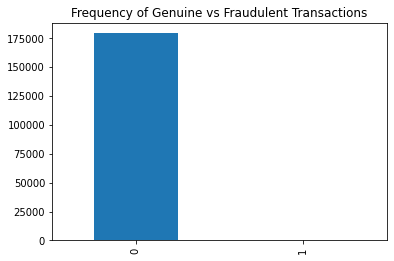

In [9]:
counts = pd.value_counts(data['Fraud'])

%matplotlib inline
print(counts)
counts.plot(kind="bar",
           title="Frequency of Genuine vs Fraudulent Transactions")

Why is this a problem?

<h2 style="background-color:Purple; text-align:center"><br>Quiz<br></h2>

<br>
<h2 style="background-color:DarkOrange; text-align:center"><br>Step 5: Improving our model<br></h2>
<br>

## Transforming the data

**Data scientists make choices that impact model outputs. At Mastercard, data scientists are dealing with the same challenge: trying to reduce fraud based on limited datasets.**

To deal with the uneven number of fraud and genuine transactions, we could artificially increase the number of fraud transactions by creating similar transactions, or we could reduce the number of genuine transactions.

With more time, we might test multiple strategies. Today we'll just try reducing the number of genuine transactions.

<mark>Run the code, and look at the mean of the Class column. What does it mean? <b>Modify number_genuine to change the number of genuine transactions that balance the classes, and re-run the code</b>.</mark>

In [10]:
# How many genuine transactions should we use to balance the classes?
number_genuine = 500

# Separate genuine transactions and fraud
genuine = data[data['Fraud'] == 0].sample(number_genuine)
fraud = data[data['Fraud'] == 1]

# Combine fraud and genuine
even_data = pd.concat([genuine, fraud])

# Summarize our new dataset, even_data
even_data.describe()

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,0.495968,97.115504,88145.298387,-2.367038,1.826293,-3.471233,2.221767,-1.537400,-0.681850,-2.765993,...,0.349127,0.180894,0.355006,-0.001476,0.000947,-0.041623,0.024428,0.036707,0.082609,0.026920
std,0.500236,210.134612,49317.453562,5.498182,3.650224,6.224178,3.212895,4.198582,1.744242,5.826678,...,1.266896,1.067178,2.785511,1.162077,1.186863,0.562276,0.664691,0.480077,1.023689,0.428831
min,0.000000,0.000000,194.000000,-30.552380,-14.007366,-31.103685,-4.293489,-22.105532,-6.406267,-43.557242,...,-3.681904,-9.150864,-22.797604,-8.887017,-19.254328,-2.754889,-4.781606,-1.152671,-7.263482,-2.951213
25%,0.000000,1.630000,45491.500000,-2.784711,-0.179243,-5.074851,-0.151188,-1.777659,-1.551056,-3.060742,...,-0.444147,-0.183981,-0.175062,-0.538291,-0.226725,-0.388661,-0.305828,-0.288700,-0.066137,-0.070073
50%,0.000000,19.595000,81764.000000,-0.821276,0.942592,-1.343919,1.203205,-0.359720,-0.638118,-0.674244,...,0.228437,0.024277,0.130657,0.010791,-0.031389,0.011384,0.038024,0.008494,0.040637,0.030122
75%,1.000000,99.990000,137064.250000,1.064858,2.791569,0.363604,4.229802,0.454404,0.089963,0.291366,...,0.992322,0.423209,0.652202,0.548872,0.199231,0.382628,0.401178,0.351076,0.426872,0.209627
max,1.000000,2125.870000,171815.000000,2.342166,22.057729,3.114829,12.114672,11.095089,6.474115,5.802537,...,5.228342,11.059004,27.202839,8.361985,9.974239,1.212078,2.261462,2.745261,4.374186,1.779364


Since we have a new dataset, we'll need to recreate our inputs, outputs, and split them into training and testing sets.

In [11]:
# Create inputs and outputs with new dataset
X = even_data.drop('Fraud', axis=1)
Y = even_data['Fraud']

# Split new inputs and outputs into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

# Train and score decision tree using new data
model = tree.DecisionTreeClassifier(max_depth = 1)
model = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9026845637583892

The last step is to visualize the decision tree we made. To do this, we've copied some code from the sklearn documentation.

<mark>Run the code below to see your tree!</mark>

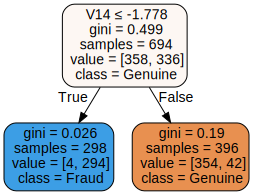

In [12]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X.columns.values,  
                     class_names=["Genuine","Fraud"],  
                     filled=True, rounded=True, 
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

You might notice your decision tree is very small. The final step is to evaluate how complex your decision tree needs to be.

<mark>Go back <b>two</b> code cells and change the max_depth of your decsion tree (line 9). Run the code, then re-run the code to visualize the tree</mark>

<mark>What size of decision tree gets the greatest accuracy for your data? Why?</mark>

<br>
<h2 style="background-color:Gold; text-align:center"><br>Step 6: Quantifying the investment<br></h2>
<br>

**Building good models requires time and resources; it is important to focus on valuable investments.**

How do you know your time was well spent?

There are huge costs associated with accepting a fraudlent transaction; [LexisNexis](https://risk.lexisnexis.com/insights-resources/research/2018-true-cost-of-fraud-study-for-the-retail-sector) finds fraud costs retailers an average of $2.94 per fraudulent dollar in fees, prevention, legal costs, etc. Declining a genuine transaction is costly too! [Ayden and 451 Research](https://go.adyen.com/rs/222-DNK-376/images/Retail%20Report%202019.pdf?mkt_tok=eyJpIjoiWXpNeE56Y3paRGszTnpBNSIsInQiOiJaVmJ1NXVJVkZFMkdHY1FCYVRGUENFemlDWnU3RSthM21LRmF3MDdtUldwSjZvMVF6ZzVjTTFjemJKS1BxZUJWWElxejZrQXVKeDhwNlZGVXkwT3FtcTkwd1BFTkwwaWZlV1BFcnM3YmY2aEQ1RnMrT3BFS1g4MTRsaWI3R1BUSSJ9) report 2 in 5 consumers have abandoned a purchase after a declined payment in the past 6 months. Customers are less likely to return to a merchant after a failed payment.

In our simulation, we'll charge $2.94 per dollar for each false approval and the cost of the transaction for each false decline. Of course, every situation is different, and a client will likely have their own costs associated with false approvals and declines.

<mark>Run the cell below to compare the cost of fraud when using your model with the cost of approving all transactions.</mark>

In [13]:
COST_PER_FRAUD_DOLLAR = 2.94 # Cost per dollar of a false approval
COST_PER_FALSE_DECLINE_DOLLAR = 1 # Cost per dollar of a false decline

predictions = list(model.predict(X_test))
truth = list(Y_test)

false_approval_cost = 0
false_approval_num = 0
false_decline_cost = 0
false_decline_num = 0
correct_num = 0
correct_cost = 0

for i in range(len(predictions)):
    if predictions[i] != truth[i]: # If our prediction was wrong
        if truth[i] == 1: # If we falsely approved
            false_approval_cost += (X_test.iloc[i, 0] * COST_PER_FRAUD_DOLLAR) # Cost increases by $2.94 * the amount of the transaction
            false_approval_num += 1
        else: # If we falsely decline
            false_decline_cost += (X_test.iloc[i, 0] * COST_PER_FALSE_DECLINE_DOLLAR) # We miss a sale, cost increases by the amount of the transaction
            false_decline_num += 1
    else: # If our prediction was correct
        correct_num += 1
        if truth[i] == 0: # It's a genuine transaction
            correct_cost += X_test.iloc[i, 0]
print("You processed {} payments. {} were correct predictions, of which the genuine transactions totalled ${} in revenue.\n\nYou had {} false approvals, which cost ${} in fees and administrative costs.\nYou had {} false declines, which cost ${} in missed sales.\n".format(len(predictions), correct_num, round(correct_cost,2),  false_approval_num, round(false_approval_cost, 2), false_decline_num, round(false_decline_cost,2)))

approve_all_cost = 0
approve_all_num = 0
all_genuine_cost = 0

for i in range(len(truth)):
    if truth[i] == 1: # There was fraud
        approve_all_cost += (X_test.iloc[i, 0] * COST_PER_FRAUD_DOLLAR)
        approve_all_num += 1
    else: # Genuine transaction
        all_genuine_cost += X_test.iloc[i, 0]

print("If you had simply approved all {} transactions, you would have falsely approved {} transactions, costing ${} while earning ${} in revenue.\n".format(len(predictions), approve_all_num, round(approve_all_cost, 2), round(all_genuine_cost, 2)))
print("Your model's predictions were worth ${}.".format(round(((correct_cost - false_decline_cost - false_approval_cost)-(all_genuine_cost - approve_all_cost)),2)))

You processed 298 payments. 269 were correct predictions, of which the genuine transactions totalled $8695.19 in revenue.

You had 21 false approvals, which cost $5557.57 in fees and administrative costs.
You had 8 false declines, which cost $85.01 in missed sales.

If you had simply approved all 298 transactions, you would have falsely approved 156 transactions, costing $49248.41 while earning $8780.2 in revenue.

Your model's predictions were worth $43520.82.


<mark>What differs in our simulation when compared to reality?</mark>

<mark>What could make our model stronger?</mark>

<h2 style="background-color:Purple; text-align:center"><br>Quiz<br></h2>